In [1]:
!pip install -q diffusers transformers accelerate safetensors

In [2]:
from huggingface_hub import login
login()

In [3]:
import torch
from diffusers import StableDiffusionPipeline

model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16
).to("cuda")

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


In [4]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split

dog_breeds = [
    "Labrador Retriever",
    "Golden Retriever",
    "German Shepherd",
    "French Bulldog",
    "Bulldog",
    "Poodle (Standard)",
    "Beagle",
    "Rottweiler",
    "Dachshund",
    "Yorkshire Terrier",
    "Boxer",
    "Doberman Pinscher",
    "Siberian Husky",
    "Great Dane",
    "Shih Tzu",
    "Chihuahua",
    "Pug",
    "Border Collie",
    "Australian Shepherd",
    "Belgian Malinois",
    "Akita",
    "Alaskan Malamute",
    "Samoyed",
    "Bernese Mountain Dog",
    "Saint Bernard",
    "Newfoundland",
    "Cane Corso",
    "Greyhound",
    "Whippet",
    "Bloodhound",
    "Basset Hound",
    "Rhodesian Ridgeback",
    "Weimaraner",
    "Vizsla",
    "Cocker Spaniel",
    "Cavalier King Charles Spaniel",
    "Pomeranian",
    "Chow Chow",
    "Shiba Inu",
    "Basenji"
]

output_dir = "40_dog_dataset"
images_per_breed = 10
num_steps = 30
guidance = 7.5

os.makedirs(output_dir, exist_ok=True)

for breed in dog_breeds:
    breed_dir = os.path.join(output_dir, breed.replace(" ", "_"))
    os.makedirs(breed_dir, exist_ok=True)

    for i in range(images_per_breed):
        prompt = (
            f"a high quality photo of a {breed}, "
            f"ultra realistic, cinematic lighting, 4k, sharp focus"
        )

        image = pipe(
            prompt,
            num_inference_steps=num_steps,
            guidance_scale=guidance
        ).images[0]

        filename = f"{breed.replace(' ', '_')}_{i}.png"
        image_path = os.path.join(breed_dir, filename)
        image.save(image_path)

        print(f"Saved: {image_path}")

print("Dataset generation complete.")


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Labrador_Retriever/Labrador_Retriever_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Labrador_Retriever/Labrador_Retriever_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Labrador_Retriever/Labrador_Retriever_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Labrador_Retriever/Labrador_Retriever_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Labrador_Retriever/Labrador_Retriever_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Labrador_Retriever/Labrador_Retriever_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Labrador_Retriever/Labrador_Retriever_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Labrador_Retriever/Labrador_Retriever_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Labrador_Retriever/Labrador_Retriever_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Labrador_Retriever/Labrador_Retriever_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Golden_Retriever/Golden_Retriever_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Golden_Retriever/Golden_Retriever_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Golden_Retriever/Golden_Retriever_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Golden_Retriever/Golden_Retriever_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Golden_Retriever/Golden_Retriever_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Golden_Retriever/Golden_Retriever_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Golden_Retriever/Golden_Retriever_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Golden_Retriever/Golden_Retriever_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Golden_Retriever/Golden_Retriever_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Golden_Retriever/Golden_Retriever_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/German_Shepherd/German_Shepherd_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/German_Shepherd/German_Shepherd_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/German_Shepherd/German_Shepherd_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/German_Shepherd/German_Shepherd_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/German_Shepherd/German_Shepherd_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/German_Shepherd/German_Shepherd_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/German_Shepherd/German_Shepherd_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/German_Shepherd/German_Shepherd_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/German_Shepherd/German_Shepherd_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/German_Shepherd/German_Shepherd_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/French_Bulldog/French_Bulldog_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/French_Bulldog/French_Bulldog_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/French_Bulldog/French_Bulldog_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/French_Bulldog/French_Bulldog_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/French_Bulldog/French_Bulldog_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/French_Bulldog/French_Bulldog_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/French_Bulldog/French_Bulldog_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/French_Bulldog/French_Bulldog_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/French_Bulldog/French_Bulldog_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/French_Bulldog/French_Bulldog_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Bulldog/Bulldog_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Bulldog/Bulldog_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Bulldog/Bulldog_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Bulldog/Bulldog_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Bulldog/Bulldog_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Bulldog/Bulldog_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Bulldog/Bulldog_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Bulldog/Bulldog_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Bulldog/Bulldog_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Bulldog/Bulldog_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Poodle_(Standard)/Poodle_(Standard)_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Poodle_(Standard)/Poodle_(Standard)_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Poodle_(Standard)/Poodle_(Standard)_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Poodle_(Standard)/Poodle_(Standard)_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Poodle_(Standard)/Poodle_(Standard)_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Poodle_(Standard)/Poodle_(Standard)_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Poodle_(Standard)/Poodle_(Standard)_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Poodle_(Standard)/Poodle_(Standard)_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Poodle_(Standard)/Poodle_(Standard)_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Poodle_(Standard)/Poodle_(Standard)_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Beagle/Beagle_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Beagle/Beagle_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Beagle/Beagle_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Beagle/Beagle_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Beagle/Beagle_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Beagle/Beagle_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Beagle/Beagle_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Beagle/Beagle_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Beagle/Beagle_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Beagle/Beagle_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Rottweiler/Rottweiler_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Rottweiler/Rottweiler_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Rottweiler/Rottweiler_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Rottweiler/Rottweiler_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Rottweiler/Rottweiler_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Rottweiler/Rottweiler_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Rottweiler/Rottweiler_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Rottweiler/Rottweiler_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Rottweiler/Rottweiler_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Rottweiler/Rottweiler_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Dachshund/Dachshund_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Dachshund/Dachshund_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Dachshund/Dachshund_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Dachshund/Dachshund_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Dachshund/Dachshund_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Dachshund/Dachshund_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Dachshund/Dachshund_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Dachshund/Dachshund_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Dachshund/Dachshund_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Dachshund/Dachshund_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Yorkshire_Terrier/Yorkshire_Terrier_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Yorkshire_Terrier/Yorkshire_Terrier_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Yorkshire_Terrier/Yorkshire_Terrier_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Yorkshire_Terrier/Yorkshire_Terrier_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Yorkshire_Terrier/Yorkshire_Terrier_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Yorkshire_Terrier/Yorkshire_Terrier_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Yorkshire_Terrier/Yorkshire_Terrier_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Yorkshire_Terrier/Yorkshire_Terrier_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Yorkshire_Terrier/Yorkshire_Terrier_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Yorkshire_Terrier/Yorkshire_Terrier_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Boxer/Boxer_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Boxer/Boxer_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Boxer/Boxer_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Boxer/Boxer_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Boxer/Boxer_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Boxer/Boxer_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Boxer/Boxer_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Boxer/Boxer_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Boxer/Boxer_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Boxer/Boxer_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Doberman_Pinscher/Doberman_Pinscher_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Doberman_Pinscher/Doberman_Pinscher_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Doberman_Pinscher/Doberman_Pinscher_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Doberman_Pinscher/Doberman_Pinscher_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Doberman_Pinscher/Doberman_Pinscher_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Doberman_Pinscher/Doberman_Pinscher_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Doberman_Pinscher/Doberman_Pinscher_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Doberman_Pinscher/Doberman_Pinscher_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Doberman_Pinscher/Doberman_Pinscher_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Doberman_Pinscher/Doberman_Pinscher_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Siberian_Husky/Siberian_Husky_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Siberian_Husky/Siberian_Husky_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Siberian_Husky/Siberian_Husky_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Siberian_Husky/Siberian_Husky_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Siberian_Husky/Siberian_Husky_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Siberian_Husky/Siberian_Husky_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Siberian_Husky/Siberian_Husky_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Siberian_Husky/Siberian_Husky_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Siberian_Husky/Siberian_Husky_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Siberian_Husky/Siberian_Husky_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Great_Dane/Great_Dane_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Great_Dane/Great_Dane_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Great_Dane/Great_Dane_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Great_Dane/Great_Dane_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Great_Dane/Great_Dane_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Great_Dane/Great_Dane_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Great_Dane/Great_Dane_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Great_Dane/Great_Dane_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Great_Dane/Great_Dane_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Great_Dane/Great_Dane_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Shih_Tzu/Shih_Tzu_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Shih_Tzu/Shih_Tzu_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Shih_Tzu/Shih_Tzu_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Shih_Tzu/Shih_Tzu_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Shih_Tzu/Shih_Tzu_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Shih_Tzu/Shih_Tzu_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Shih_Tzu/Shih_Tzu_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Shih_Tzu/Shih_Tzu_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Shih_Tzu/Shih_Tzu_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Shih_Tzu/Shih_Tzu_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Chihuahua/Chihuahua_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Chihuahua/Chihuahua_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Chihuahua/Chihuahua_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Chihuahua/Chihuahua_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Chihuahua/Chihuahua_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Chihuahua/Chihuahua_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Chihuahua/Chihuahua_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Chihuahua/Chihuahua_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Chihuahua/Chihuahua_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Chihuahua/Chihuahua_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Pug/Pug_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Pug/Pug_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Pug/Pug_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Pug/Pug_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Pug/Pug_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Pug/Pug_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Pug/Pug_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Pug/Pug_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Pug/Pug_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Pug/Pug_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Border_Collie/Border_Collie_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Border_Collie/Border_Collie_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Border_Collie/Border_Collie_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Border_Collie/Border_Collie_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Border_Collie/Border_Collie_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Border_Collie/Border_Collie_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Border_Collie/Border_Collie_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Border_Collie/Border_Collie_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Border_Collie/Border_Collie_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Border_Collie/Border_Collie_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Australian_Shepherd/Australian_Shepherd_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Australian_Shepherd/Australian_Shepherd_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Australian_Shepherd/Australian_Shepherd_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Australian_Shepherd/Australian_Shepherd_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Australian_Shepherd/Australian_Shepherd_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Australian_Shepherd/Australian_Shepherd_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Australian_Shepherd/Australian_Shepherd_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Australian_Shepherd/Australian_Shepherd_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Australian_Shepherd/Australian_Shepherd_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Australian_Shepherd/Australian_Shepherd_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Belgian_Malinois/Belgian_Malinois_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Belgian_Malinois/Belgian_Malinois_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Belgian_Malinois/Belgian_Malinois_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Belgian_Malinois/Belgian_Malinois_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Belgian_Malinois/Belgian_Malinois_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Belgian_Malinois/Belgian_Malinois_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Belgian_Malinois/Belgian_Malinois_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Belgian_Malinois/Belgian_Malinois_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Belgian_Malinois/Belgian_Malinois_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Belgian_Malinois/Belgian_Malinois_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Akita/Akita_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Akita/Akita_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Akita/Akita_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Akita/Akita_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Akita/Akita_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Akita/Akita_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Akita/Akita_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Akita/Akita_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Akita/Akita_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Akita/Akita_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Alaskan_Malamute/Alaskan_Malamute_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Alaskan_Malamute/Alaskan_Malamute_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Alaskan_Malamute/Alaskan_Malamute_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Alaskan_Malamute/Alaskan_Malamute_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Alaskan_Malamute/Alaskan_Malamute_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Alaskan_Malamute/Alaskan_Malamute_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Alaskan_Malamute/Alaskan_Malamute_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Alaskan_Malamute/Alaskan_Malamute_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Alaskan_Malamute/Alaskan_Malamute_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Alaskan_Malamute/Alaskan_Malamute_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Samoyed/Samoyed_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Samoyed/Samoyed_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Samoyed/Samoyed_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Samoyed/Samoyed_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Samoyed/Samoyed_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Samoyed/Samoyed_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Samoyed/Samoyed_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Samoyed/Samoyed_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Samoyed/Samoyed_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Samoyed/Samoyed_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Bernese_Mountain_Dog/Bernese_Mountain_Dog_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Bernese_Mountain_Dog/Bernese_Mountain_Dog_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Bernese_Mountain_Dog/Bernese_Mountain_Dog_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Bernese_Mountain_Dog/Bernese_Mountain_Dog_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Bernese_Mountain_Dog/Bernese_Mountain_Dog_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Bernese_Mountain_Dog/Bernese_Mountain_Dog_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Bernese_Mountain_Dog/Bernese_Mountain_Dog_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Bernese_Mountain_Dog/Bernese_Mountain_Dog_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Bernese_Mountain_Dog/Bernese_Mountain_Dog_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Bernese_Mountain_Dog/Bernese_Mountain_Dog_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Saint_Bernard/Saint_Bernard_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Saint_Bernard/Saint_Bernard_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Saint_Bernard/Saint_Bernard_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Saint_Bernard/Saint_Bernard_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Saint_Bernard/Saint_Bernard_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Saint_Bernard/Saint_Bernard_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Saint_Bernard/Saint_Bernard_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Saint_Bernard/Saint_Bernard_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Saint_Bernard/Saint_Bernard_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Saint_Bernard/Saint_Bernard_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Newfoundland/Newfoundland_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Newfoundland/Newfoundland_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Newfoundland/Newfoundland_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Newfoundland/Newfoundland_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Newfoundland/Newfoundland_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Newfoundland/Newfoundland_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Newfoundland/Newfoundland_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Newfoundland/Newfoundland_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Newfoundland/Newfoundland_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Newfoundland/Newfoundland_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Cane_Corso/Cane_Corso_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Cane_Corso/Cane_Corso_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Cane_Corso/Cane_Corso_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Cane_Corso/Cane_Corso_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Cane_Corso/Cane_Corso_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Cane_Corso/Cane_Corso_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Cane_Corso/Cane_Corso_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Cane_Corso/Cane_Corso_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Cane_Corso/Cane_Corso_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Cane_Corso/Cane_Corso_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Greyhound/Greyhound_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Greyhound/Greyhound_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Greyhound/Greyhound_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Greyhound/Greyhound_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Greyhound/Greyhound_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Greyhound/Greyhound_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Greyhound/Greyhound_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Greyhound/Greyhound_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Greyhound/Greyhound_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Greyhound/Greyhound_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Whippet/Whippet_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Whippet/Whippet_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Whippet/Whippet_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Whippet/Whippet_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Whippet/Whippet_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Whippet/Whippet_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Whippet/Whippet_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Whippet/Whippet_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Whippet/Whippet_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Whippet/Whippet_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Bloodhound/Bloodhound_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Bloodhound/Bloodhound_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Bloodhound/Bloodhound_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Bloodhound/Bloodhound_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Bloodhound/Bloodhound_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Bloodhound/Bloodhound_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Bloodhound/Bloodhound_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Bloodhound/Bloodhound_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Bloodhound/Bloodhound_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Bloodhound/Bloodhound_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Basset_Hound/Basset_Hound_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Basset_Hound/Basset_Hound_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Basset_Hound/Basset_Hound_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Basset_Hound/Basset_Hound_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Basset_Hound/Basset_Hound_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Basset_Hound/Basset_Hound_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Basset_Hound/Basset_Hound_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Basset_Hound/Basset_Hound_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Basset_Hound/Basset_Hound_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Basset_Hound/Basset_Hound_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Rhodesian_Ridgeback/Rhodesian_Ridgeback_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Rhodesian_Ridgeback/Rhodesian_Ridgeback_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Rhodesian_Ridgeback/Rhodesian_Ridgeback_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Rhodesian_Ridgeback/Rhodesian_Ridgeback_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Rhodesian_Ridgeback/Rhodesian_Ridgeback_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Rhodesian_Ridgeback/Rhodesian_Ridgeback_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Rhodesian_Ridgeback/Rhodesian_Ridgeback_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Rhodesian_Ridgeback/Rhodesian_Ridgeback_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Rhodesian_Ridgeback/Rhodesian_Ridgeback_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Rhodesian_Ridgeback/Rhodesian_Ridgeback_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Weimaraner/Weimaraner_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Weimaraner/Weimaraner_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Weimaraner/Weimaraner_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Weimaraner/Weimaraner_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Weimaraner/Weimaraner_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Weimaraner/Weimaraner_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Weimaraner/Weimaraner_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Weimaraner/Weimaraner_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Weimaraner/Weimaraner_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Weimaraner/Weimaraner_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Vizsla/Vizsla_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Vizsla/Vizsla_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Vizsla/Vizsla_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Vizsla/Vizsla_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Vizsla/Vizsla_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Vizsla/Vizsla_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Vizsla/Vizsla_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Vizsla/Vizsla_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Vizsla/Vizsla_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Vizsla/Vizsla_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Cocker_Spaniel/Cocker_Spaniel_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Cocker_Spaniel/Cocker_Spaniel_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Cocker_Spaniel/Cocker_Spaniel_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Cocker_Spaniel/Cocker_Spaniel_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Cocker_Spaniel/Cocker_Spaniel_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Cocker_Spaniel/Cocker_Spaniel_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Cocker_Spaniel/Cocker_Spaniel_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Cocker_Spaniel/Cocker_Spaniel_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Cocker_Spaniel/Cocker_Spaniel_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Cocker_Spaniel/Cocker_Spaniel_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Cavalier_King_Charles_Spaniel/Cavalier_King_Charles_Spaniel_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Cavalier_King_Charles_Spaniel/Cavalier_King_Charles_Spaniel_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Cavalier_King_Charles_Spaniel/Cavalier_King_Charles_Spaniel_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Cavalier_King_Charles_Spaniel/Cavalier_King_Charles_Spaniel_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Cavalier_King_Charles_Spaniel/Cavalier_King_Charles_Spaniel_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Cavalier_King_Charles_Spaniel/Cavalier_King_Charles_Spaniel_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Cavalier_King_Charles_Spaniel/Cavalier_King_Charles_Spaniel_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Cavalier_King_Charles_Spaniel/Cavalier_King_Charles_Spaniel_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Cavalier_King_Charles_Spaniel/Cavalier_King_Charles_Spaniel_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Cavalier_King_Charles_Spaniel/Cavalier_King_Charles_Spaniel_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Pomeranian/Pomeranian_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Pomeranian/Pomeranian_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Pomeranian/Pomeranian_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Pomeranian/Pomeranian_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Pomeranian/Pomeranian_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Pomeranian/Pomeranian_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Pomeranian/Pomeranian_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Pomeranian/Pomeranian_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Pomeranian/Pomeranian_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Pomeranian/Pomeranian_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Chow_Chow/Chow_Chow_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Chow_Chow/Chow_Chow_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Chow_Chow/Chow_Chow_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Chow_Chow/Chow_Chow_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Chow_Chow/Chow_Chow_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Chow_Chow/Chow_Chow_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Chow_Chow/Chow_Chow_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Chow_Chow/Chow_Chow_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Chow_Chow/Chow_Chow_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Chow_Chow/Chow_Chow_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Shiba_Inu/Shiba_Inu_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Shiba_Inu/Shiba_Inu_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Shiba_Inu/Shiba_Inu_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Shiba_Inu/Shiba_Inu_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Shiba_Inu/Shiba_Inu_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Shiba_Inu/Shiba_Inu_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Shiba_Inu/Shiba_Inu_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Shiba_Inu/Shiba_Inu_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Shiba_Inu/Shiba_Inu_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Shiba_Inu/Shiba_Inu_9.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Basenji/Basenji_0.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Basenji/Basenji_1.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Basenji/Basenji_2.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Basenji/Basenji_3.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Basenji/Basenji_4.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Basenji/Basenji_5.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Basenji/Basenji_6.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Basenji/Basenji_7.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Basenji/Basenji_8.png


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: 40_dog_dataset/Basenji/Basenji_9.png
Dataset generation complete.


In [5]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


In [6]:
dataset_dir = "40_dog_dataset"

full_dataset = datasets.ImageFolder(
    root=dataset_dir,
    transform=transform
)

num_classes = len(full_dataset.classes)
print("Classes:", num_classes)


Classes: 40


In [7]:
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size

train_dataset, val_dataset = random_split(
    full_dataset, [train_size, val_size]
)


In [8]:
batch_size = 16

train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True
)

val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False
)


In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(pretrained=True)

# Replace final layer
model.fc = nn.Linear(model.fc.in_features, num_classes)

model = model.to(device)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 44.7M/44.7M [00:00<00:00, 179MB/s]


In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)


In [11]:
epochs = 10

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)

    # Validation
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            total += labels.size(0)
            correct += (preds == labels).sum().item()

    val_acc = 100 * correct / total

    print(
        f"Epoch [{epoch+1}/{epochs}] "
        f"Loss: {avg_loss:.4f} "
        f"Val Acc: {val_acc:.2f}%"
    )


Epoch [1/10] Loss: 3.2965 Val Acc: 42.50%
Epoch [2/10] Loss: 1.6469 Val Acc: 68.75%
Epoch [3/10] Loss: 0.8422 Val Acc: 78.75%
Epoch [4/10] Loss: 0.4684 Val Acc: 80.00%
Epoch [5/10] Loss: 0.2905 Val Acc: 82.50%
Epoch [6/10] Loss: 0.1854 Val Acc: 81.25%
Epoch [7/10] Loss: 0.1406 Val Acc: 82.50%
Epoch [8/10] Loss: 0.1055 Val Acc: 81.25%
Epoch [9/10] Loss: 0.0712 Val Acc: 82.50%
Epoch [10/10] Loss: 0.0591 Val Acc: 81.25%


In [12]:
torch.save(model.state_dict(), "resnet18_40_dog_breeds.pth")


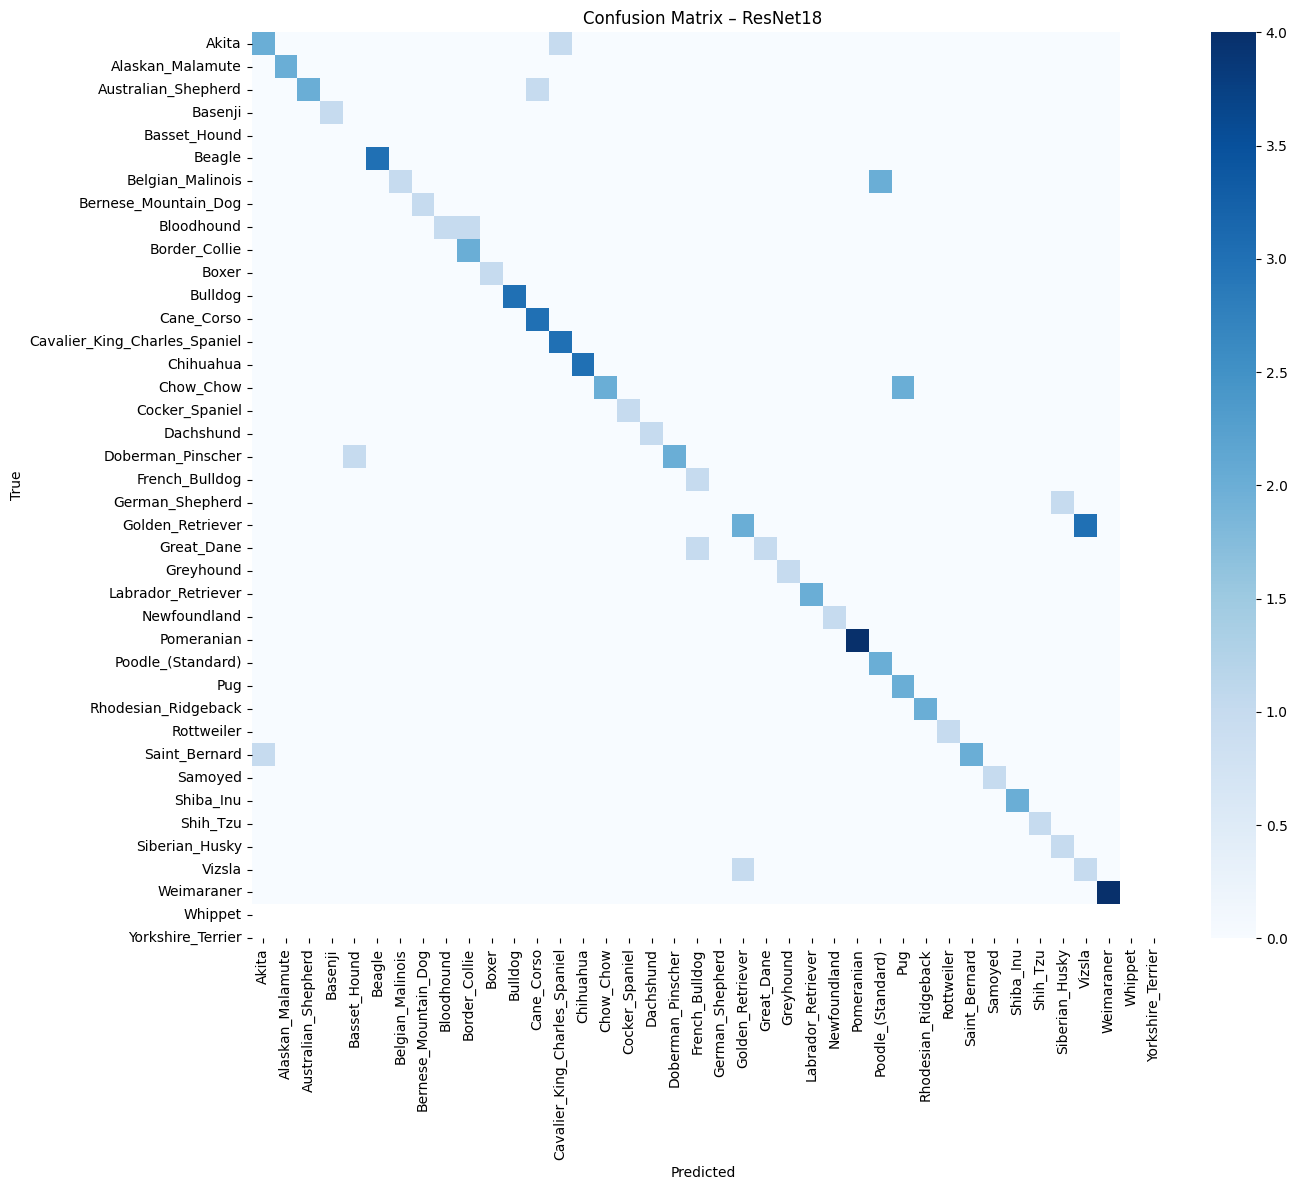

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(14, 12))
sns.heatmap(
    cm,
    xticklabels=full_dataset.classes,
    yticklabels=full_dataset.classes,
    cmap="Blues",
    cbar=True
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – ResNet18")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
